# Logistic Regression Demo - Large Dataset

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.impute import SimpleImputer
from io import StringIO
%matplotlib inline
os.getcwd()

## Import Dataset

In [ ]:
adult=pd.read_table('../adult.data',sep=',',header=None)
adult.columns=["age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","nativecountry","Income"]
adult.head()

## Target variable is imbalanced - Apply SMOTE

## Exploratory Data Analysis

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    32561 non-null object
Income           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
adult.describe()

In [ ]:
# No Null values in the columns
adult.isnull().sum()

In [6]:
adult.Income.value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

## Convert catgeorical to Numeric variables

In [ ]:
categorical=[c for c in adult.columns if adult.dtypes[c]=='object']
continous=[c for c in adult.columns if adult.dtypes[c]!='object']
categorical

In [8]:
adult[categorical]=adult[categorical].apply(lambda x: LabelEncoder().fit_transform(x))

In [ ]:
adult.info()

In [ ]:
fig=sns.FacetGrid(adult,col='sex')
fig.map(plt.hist,'Income')

## Split the target and predictors to y and x variables

In [11]:
y=adult['Income']
x=adult.drop('Income',axis=1)

### Scaler  - Standard Scaler used here to scale the data

In [12]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [13]:
len(x),len(y)

(32561, 32561)

### Split the processed dataset into train and test datasets

In [14]:

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.30)

In [15]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((22792, 14), (22792,), (9769, 14), (9769,))

## Use SMOTE to balance the target variable

In [16]:
oversample=SMOTE()
xtrain,ytrain=oversample.fit_sample(xtrain,ytrain)

### Scale the data using Standard Scaler

In [17]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

## Instantiate Logistic Regression Model

In [18]:
lm=LogisticRegression(max_iter=100,random_state=10,C=2.2)

### Create the Linear Regression Model

In [19]:
lgregressor=lm.fit(xtrain,ytrain)


## Predict the model with test dataset

In [20]:
lgresult=lgregressor.predict(xtest)

## Check Accuracy for the model

In [ ]:
### Graph
np.set_printoptions(precision=None,suppress=None)
cm=confusion_matrix(ytest,lgresult)
lgr_acc=accuracy_score(ytest,lgresult)
print(lgr_acc)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) 

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(ytest, lgresult)
fpr, tpr, thresholds = roc_curve(ytest, lgregressor.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Without Scaler

In [23]:
test=adult['Income']
train=adult.drop('Income',axis=1)


In [24]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train,test,test_size=0.3,random_state=3)

In [25]:
xtrain1.shape,ytrain1.shape

((22792, 14), (22792,))

In [26]:
model1=lm.fit(xtrain1,ytrain1)

In [27]:
lgresult1=model1.predict(xtest1)

In [ ]:
### Graph not working fine. 
np.set_printoptions(precision=None,suppress=None)
cm=confusion_matrix(ytest,lgresult1)
lgr_acc1=accuracy_score(ytest,lgresult1)
print(lgr_acc1)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) 

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from io import StringIO

In [30]:
xtraintree,xtesttree,ytraintree,ytesttree=train_test_split(train,test,test_size=30,random_state=567)

In [31]:
type(xtraintree)

pandas.core.frame.DataFrame

In [32]:
dt=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=3,max_depth=3)
dtmodel=dt.fit(xtraintree,ytraintree)

In [33]:
dtresult=dtmodel.predict(xtesttree)

## Calculate Decision Tree Accuracy

In [34]:
#Calculating accuracy
dt_acc=accuracy_score(ytesttree,dtresult)
print('Accuracy is:',dt_acc)

Accuracy is: 0.8


### Visualization of the tree

In [ ]:
import sklearn.tree as tree
from io import StringIO
export_graphviz(dtmodel, 
 out_file=None, 
 class_names=list(['Yes','No']), # the target names.
 feature_names=train.columns,
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)


/Users/nagarajugooty/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


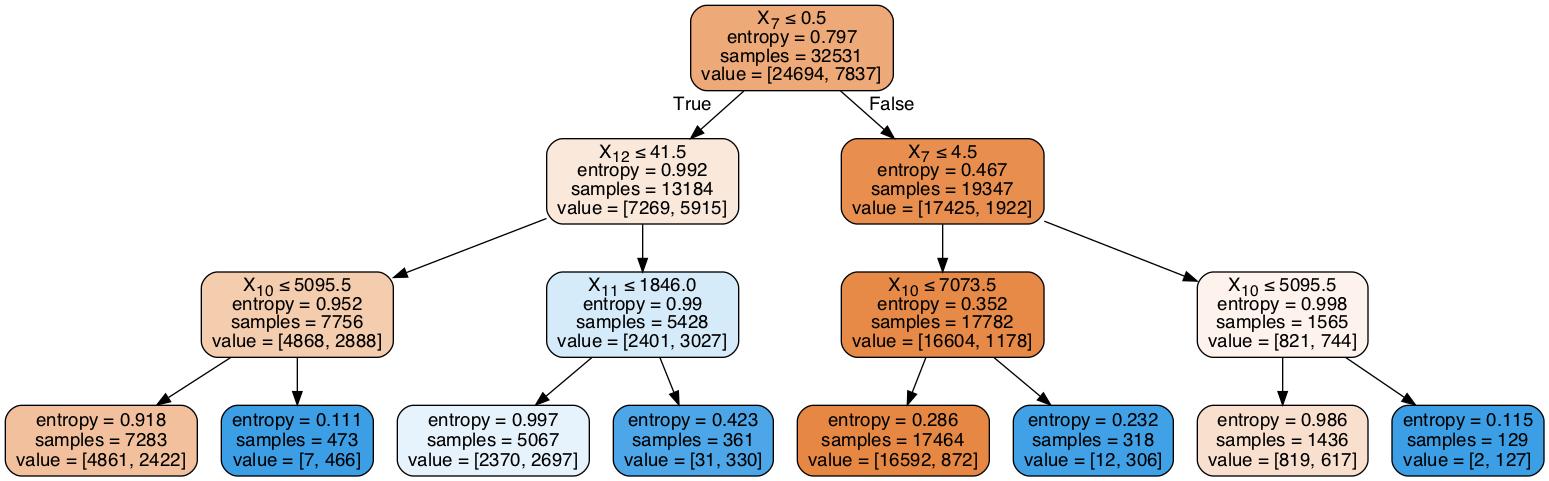

In [36]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtmodel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [37]:
class_col=adult['Income'].astype('object').unique()
class_col=list(class_col)
type(class_col)
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationnum',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry'],
      dtype='object')

In [ ]:
plt.figure(figsize=(20,20)) 
tree.plot_tree(dtmodel,feature_names=list(train.columns))
plt.show()

## Random Forest

### Feature Importance 

In [ ]:
'''
- Selecting only the important features
'''
features=pd.DataFrame({'Features':xtraintree.columns,'Importance':np.round(dtmodel.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)
print(features)

In [ ]:
#Training
rfmodel=RandomForestClassifier(n_estimators=200, criterion='entropy',max_depth=3)
rfmodel.fit(xtraintree,ytraintree)

In [ ]:
rfresult=rfmodel.predict(xtesttree)


### Calculate the RandomForest Accuracy

In [ ]:
rf_acc=accuracy_score(ytesttree,rfresult)
print('Accuracy is:',rf_acc)

### Visualization of the RF Tree

In [ ]:
# Need to do it

## KNN K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn6=KNeighborsClassifier(n_neighbors=6)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(xtrain,ytrain)
knn6.fit(xtrain,ytrain)

### Calculate the KNN Accuracy

### with K=6

In [ ]:
knnresult6=knn6.predict(xtest)
acc_knn6=accuracy_score(ytest,knnresult6)
print('Accuracy Score: ',acc_knn6)

In [ ]:
knnresult3=knn3.predict(xtest)
acc_knn3=accuracy_score(ytest,knnresult3)
print('Accuracy Score: ',acc_knn3)

## ROC Curve

In [ ]:
# NOt working properly

knn6_prob=knn6.predict_proba(xtest).T
knn3_prob=knn3.predict_proba(xtest).T

dummy_y_test=pd.get_dummies(ytest)

knn6_roc_auc=dict()
knn3_roc_auc=dict()
lfpr6=dict()
ltpr6=dict()
lfpr3=dict()
ltpr3=dict()
lthresholds6=dict()
lthresholds3=dict()
for i in dummy_y_test.columns:
    knn6_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn6_prob[i-1])
    knn3_roc_auc[i]=roc_auc_score(dummy_y_test[i],knn3_prob[i-1])
    lfpr6[i], ltpr6[i], lthresholds6[i] = roc_curve(dummy_y_test[i], knn6_prob[i-1])
    lfpr3[i], ltpr3[i], lthresholds3[i] = roc_curve(dummy_y_test[i], knn3_prob[i-1])


for i in dummy_y_test.columns:
    plt.plot(lfpr6[i], ltpr6[i], label='KNN 6 Class '+str(i)+ ' (area = %0.2f)' % knn6_roc_auc[i])
    plt.plot(lfpr3[i], ltpr3[i],'-.', label='KNN 3 Class '+str(i)+ ' (area = %0.2f)' % knn3_roc_auc[i])



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

### Gaussian NB

In [ ]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(xtrain,ytrain)

### Bernoulli NB

In [ ]:
bernoulli_nb=BernoulliNB()
bernoulli_nb.fit(xtrain,ytrain)

### Caluclate Naive Bayes Accuracy

### Gaussian Naive Bayes

In [ ]:
gnbresult=gaussian_nb.predict(xtest)
acc_gnb=accuracy_score(ytest,gnbresult)
print('Accuracy Score: ',acc_gnb)

### Bernoulli Naive Bayes

In [ ]:
bnbresult=bernoulli_nb.predict(xtest)
acc_bnb=accuracy_score(ytest,bnbresult)
print('Accuracy Score: ',acc_bnb)

In [ ]:
plt.barh(['Gaussian','Bernoulli'],[acc_gnb,acc_bnb])

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

### Linear SVM

In [ ]:
svclinearmodel=SVC(C=10,kernel='linear')
svclinearmodel.fit(xtrain,ytrain)

### Gaussian RBF

In [ ]:
svcrbfmodel=SVC(C=10,kernel='rbf',gamma=2)
svcrbfmodel.fit(xtrain,ytrain)

### Calculate SVM Accuracy

### Linear SVM

In [ ]:
svmlinearresult=svclinearmodel.predict(xtest)
acc_svc_linear=accuracy_score(ytest,svmlinearresult)
print('Accuracy Score: ',acc_svc_linear)

### Gaussian RBF SVM

In [ ]:
svmrbfresult=svcrbfmodel.predict(xtest)
acc_svc_rbf=accuracy_score(ytest,svmrbfresult)
print('Accuracy Score: ',acc_svc_rbf)

In [ ]:
accuracy_comparison=pd.DataFrame({'Model':['Logistic Regression with Scaling','Logistic Regression w/o Scaling','Decision Tree','RandomForest','KNN 6','KNN 3','NB Gaussian','NB Bernoulli','SVM Linear','SVM RBF'],
                                 'Accuracy':[lgr_acc,lgr_acc1,dt_acc,rf_acc,acc_knn6,acc_knn3,acc_gnb,acc_bnb,acc_svc_linear,acc_svc_rbf]})

In [ ]:
accuracy_comparison.sort_values('Accuracy',ascending=False)

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
xtrainpca,xtestpca,ytrainpca,ytestpca=train_test_split(train,test,test_size=0.30,random_state=1009)

In [ ]:
pca=PCA()

In [ ]:
pca.fit(xtrain) # fit only for train data set

In [ ]:
# transform for both train and test datasets
xtrain=pca.transform(xtrain)
xtest=pca.transform(xtest)

In [ ]:
xtrain.shape, xtest.shape

In [ ]:
pca.explained_variance_ratio_ 

In [ ]:
xtrain[0,0:6]

In [ ]:
xtrain[:,0:6]

In [ ]:
lgrpca=LogisticRegression()
lgrpca.fit(xtrain[:,0:6],ytrain)

In [ ]:
pca_predict=lgrpca.predict(xtest[:,0:6])

In [ ]:
pca_result=accuracy_score(ytest,pca_predict)
print(pca_result)